# Exercise session 1

## Problem 1 (Matrix Standardization)
Write a function that accepts data matrix $X \in \mathbb{R}^{n \times d}$ input and outputs the same data after normalization. $n$ is the number of samples, and $d$ the number of dimensions, i.e. rows contain samples and columns features.  You can generate random data as `np.random.rand(numsamples, numfeatures)`

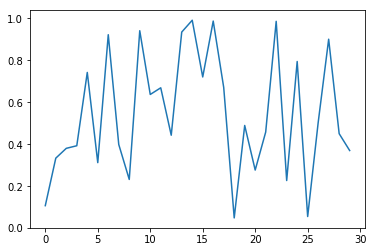

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore 

n = 10000
d = 30

signal = np.random.rand(n, d)

# Plot first sample
plt.plot(signal[0])
plt.show()

In [64]:
def standardize(X):
    '''
    Input: 
        Matrix X (N x M)
    Output: 
        Matrix Xs (N x M)
    '''
    return (X - X.mean(axis=0)) / X.std(axis=0) 

In [61]:
standardize(signal) == zscore(signal, axis=0)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

## Problem 2 (Pairwise Distances in the Plane)
Write a function that accepts two matrices $P \in \mathbb{R}^{q \times 2}$, $Q \in \mathbb{R}^{q \times 2}$ as input, where each row contains the (x,y) coordinates of an interest point. Note that the number of points (p and q) do not have to be equal. As output, compute the pairwise distances of all points in P to all points in Q and collect them in matrix D. Element $D_{i,j}$ is the Euclidean distance of the i-th point in P to the $j$-th point in Q.

In [88]:
def pairwise(P, Q):
    '''
    Input: 
        Matrix P (p x 2)
        Matrix Q (q x 2)
    Output: 
        Matrix D (p x q)
    '''
    p,q = P.shape[0],Q.shape[0]
    D = np.zeros((p,q))
    for i in range(p):
        D[i] = np.linalg.norm(p_sig[0] - q_sig, axis=1)
    return D

In [89]:
p,q = 100, 200
p_sig = signal = np.random.rand(p, 2)
q_sig = signal = np.random.rand(q, 2)

In [91]:
pairwise(p_sig, q_sig).shape

(100, 200)

## Problem 3 (Likelihood of a Data Sample)
We ask you to implement the assignment step for the two model case, i.e. k = 2. As input, your function receives a data matrix $X \in \mathbb{R}^{d \times n}$ (where $x_i$ is the $i$-th column of $X$) and the parameters $\theta_1 = (\mu_1,\Sigma_1)$ and $\theta_2 = (\mu_2, \Sigma_2)$ of two multivariate Gaussian distributions:


In [120]:
n, d, k = 100, 2, 2
X = np.random.rand(n, d) # uniform distribution over [0, 1).

# means: uniform distr. between [0,0.5] and [0.5,1]
means = [np.random.rand(d) * 0.5 + 0.5 , - np.random.rand(d)  * 0.5 + 0.5] 

# var: diagonal covariance matrix 
S = np.diag(np.random.rand(d)) 


sigmas = np.array([S]*k)



In [125]:
def gauss(x, mu, sigma):
    a = np.exp(-1/2 * np.sum((x - mu).T * np.linalg.inv(sigma) * (x - mu)))
    b = (2 * np.pi)**(d/2) * np.linalg.det(sigma)**(1/2)
    return a / b

In [162]:
P = [np.argmax([
        gauss(x, means[0], sigmas[0]), 
        gauss(x, means[1], sigmas[1])
    ]) for x in X ]

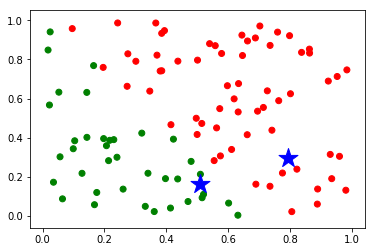

In [178]:
plt.scatter(X[:, 0], X[:, 1], c=np.array(['red', 'green'])[P])
plt.scatter(means[0], means[1], marker='*', s=400, c='blue')
plt.show()